In [78]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


Question 1: Use yfinance to Extract Stock Data

In [79]:
tesla=yf.Ticker('TSLA')

In [80]:
tesla_data=tesla.history(period="max")

In [81]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


#Question 2: Use Webscraping to Extract Tesla Revenue Data


In [82]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [83]:
soup = BeautifulSoup(html_data, 'html.parser')

In [96]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
tables = soup.find_all('table')
for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():
        tbody = table.find('tbody')
        if tbody:
            for row in tbody.find_all('tr'):
                col = row.find_all('td')
                if len(col) >= 2:
                    date = col[0].text.strip()
                    revenue = col[1].text.strip()
                    row_df = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                    tesla_revenue = pd.concat([tesla_revenue, row_df], ignore_index=True)
print("DataFrame after populating:")


DataFrame after populating:


In [98]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [100]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [101]:
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


Question 3: Use yfinance to Extract Stock Data

In [16]:
gmestop=yf.Ticker("GME")

In [17]:
gme_data=gmestop.history(period="max")

In [18]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

In [19]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text
html_data_2[:500]

'<!DOCTYPE html>\n<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->\n<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g'

In [20]:
soup = BeautifulSoup(html_data_2, 'html5lib')
print(soup.prettify()[:500]) 

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


In [21]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in soup.find_all('table'):
    header = table.find('th')
    if header and header.get_text().startswith("GameStop Quarterly Revenue"):
        tbody = table.find("tbody")
        if tbody:
            rows = tbody.find_all("tr")
            data = []
            for row in rows:
                cols = row.find_all("td")
                if len(cols) == 2:
                    Date = cols[0].get_text(strip=True)
                    Revenue = cols[1].get_text(strip=True).replace("$", "").replace(",", "")
                    data.append({"Date": Date, "Revenue": Revenue})
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame(data)], ignore_index=True)

In [22]:
print(gme_revenue.head())

         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548


Question 5: Plot Tesla Stock Graph

In [102]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

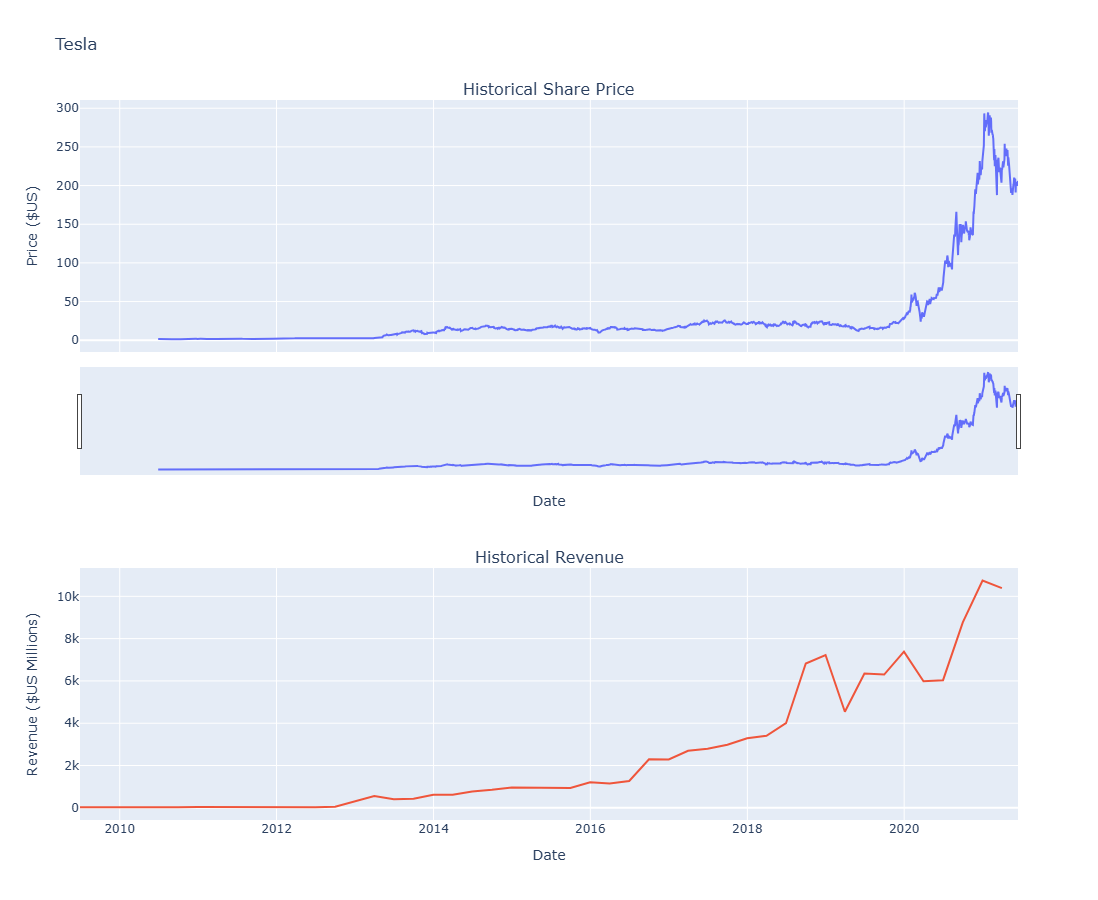

In [103]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

Question 6: Plot GameStop Stock Graph


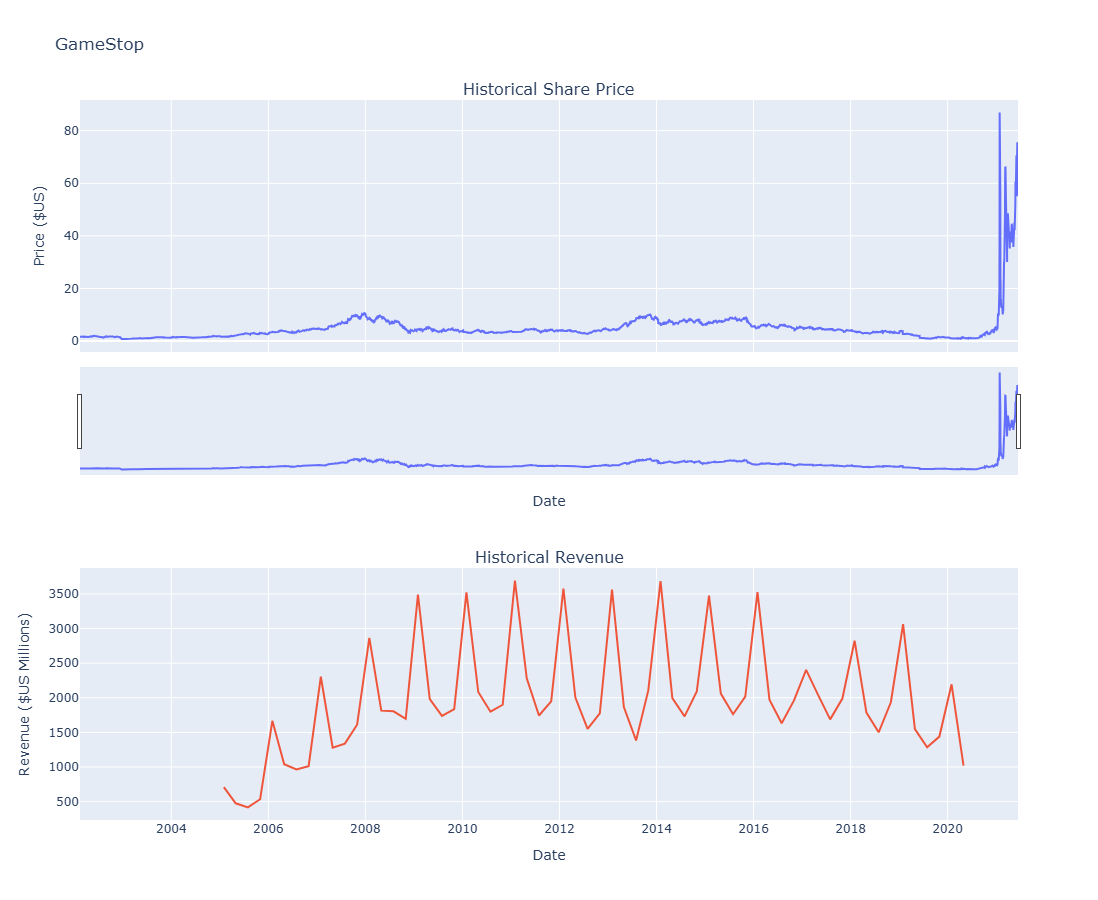

In [104]:
make_graph(gme_data, gme_revenue, 'GameStop')
